# Задача регрессии. Дерево решений



In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')

In [ ]:
df_cut=df[['Growth','Weight','Hair length','Shoe size']]
df_cut=df_cut.dropna()

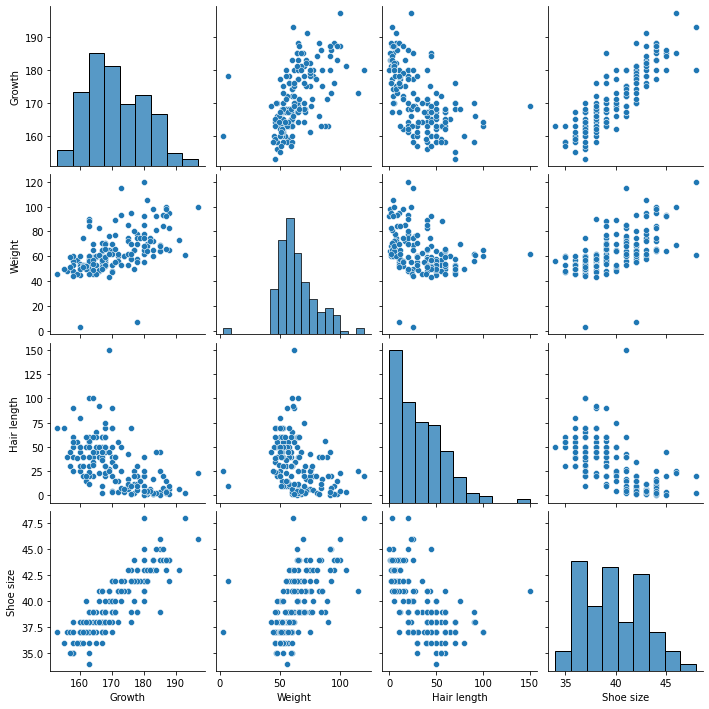

In [ ]:
sns.pairplot(df_cut)

Гипотеза: угадать рост человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [ ]:
model=tree.DecisionTreeRegressor(max_depth=12)
model.fit(df_cut[['Weight','Hair length','Shoe size']].values.reshape(-1,3), y=df_cut['Growth'].values)

DecisionTreeRegressor(max_depth=12)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Weight','Hair length','Shoe size'],  
                      class_names='Growths',  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Загружаем тестовую выбоку

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Hair length','Shoe size']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [ ]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Weight','Hair length','Shoe size']].values.reshape(-1,3))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Growth'], df_test_cut['Predicted'])

5.279220779220779

In [3]:
df_cut=df[['Age','Year of birth','Month of birthday']]


In [4]:
model=tree.DecisionTreeRegressor(max_depth=3)
model.fit(df_cut[['Year of birth','Month of birthday']].values.reshape(-1,2), y=df_cut['Age'].values)

DecisionTreeRegressor(max_depth=3)

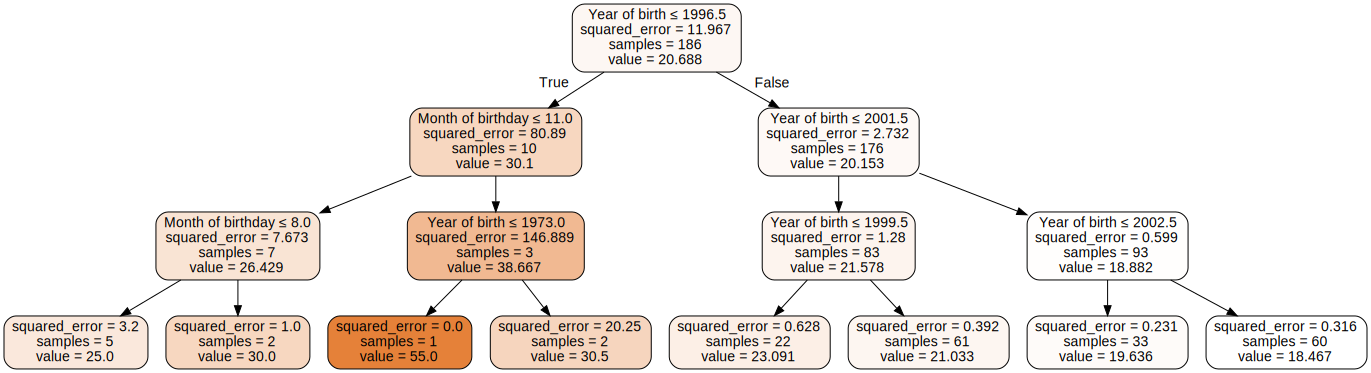

In [6]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Year of birth','Month of birthday'],  
                      class_names='Ages',  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [7]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')
df_test_cut=df_test[['Age','Year of birth','Month of birthday']]
df_test_cut=df_test_cut.dropna()

In [8]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Year of birth','Month of birthday']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test_cut['Age'], df_test_cut['Predicted'])

0.7241329318612689